## **Import library**

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
#split data
from sklearn.model_selection import train_test_split

#ML_model_random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## **Open Data**

In [3]:
d = pd.read_csv('/content/drive/My Drive/RainData/Station/Dataset.csv')
d.shape

(1539, 46)

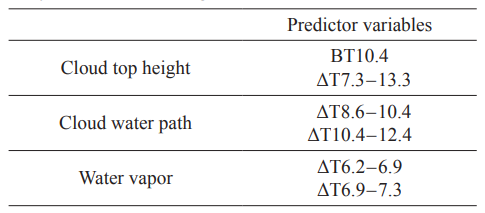

In [4]:
d1 = d[['10.4', '7.3-13.3','8.6-10.4','10.4-12.4', '6.2-6.9', '6.9-7.3', 'Giá trị']]
d1.shape

(1539, 7)

## **Data Preparation**

In [5]:
labels = np.array(list(range(1539)))
rnum = labels[d1['Giá trị'] > 0. ]
nnum = labels[d1['Giá trị'] == 0.]
print('Rain = ', len(rnum))
print('No rain = ', len(nnum))

Rain =  52
No rain =  1487


In [6]:
nnum_train, nnum_test, = train_test_split(nnum, train_size=0.35, random_state = 40)
len(nnum_train)

520

In [7]:
dfn = d1.loc[nnum_train, :]
dfr = d1.loc[rnum, :]
dfn['class'] = 0
dfr['class'] = 1
df = pd.concat((dfn, dfr), axis=0)

In [8]:
df.iloc[:, 0:]

,10.4,7.3-13.3,8.6-10.4,10.4-12.4,6.2-6.9,6.9-7.3,Giá trị,class
1464,-7851.0,-82.0,-53.0,143.0,191.0,-69.0,0.0,0
857,-4787.0,31.0,-33.0,153.0,-208.0,-71.0,0.0,0
1065,-674.0,-582.0,-112.0,598.0,-739.0,-702.0,0.0,0
323,1865.0,-1675.0,-229.0,749.0,-1033.0,-1011.0,0.0,0
720,121.0,-823.0,-52.0,794.0,-876.0,-856.0,0.0,0
...,...,...,...,...,...,...,...,...
1323,1639.0,-1179.0,-191.0,465.0,-1061.0,-925.0,0.4,1
1330,1358.0,-1166.0,-211.0,377.0,-778.0,-715.0,0.6,1
1337,1377.0,-1279.0,-140.0,452.0,-773.0,-762.0,0.2,1
1338,532.0,-918.0,-126.0,324.0,-783.0,-705.0,0.4,1


### **MODELLING**

### **Classification(rain and no rain)**

In [60]:
bandsclf = df.iloc[:, 0:6]
clf = df.iloc[:, 7]

In [61]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(bandsclf, clf, random_state = 40, test_size = 0.33)

In [62]:
model_clf = RandomForestClassifier(n_estimators=500, oob_score=True)

In [63]:
model_clf.fit(X_trainc, y_trainc)

RandomForestClassifier(n_estimators=500, oob_score=True)

In [64]:
predict_clf = model_clf.predict(X_testc)
conf_matrix = confusion_matrix(predict_clf, y_testc)
print(conf_matrix)
class_report = classification_report(predict_clf, y_testc)
print(class_report)

[[174  13]
 [  0   2]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       187
           1       0.13      1.00      0.24         2

    accuracy                           0.93       189
   macro avg       0.57      0.97      0.60       189
weighted avg       0.99      0.93      0.96       189



### **Regression**

In [65]:
dfreg = df.drop(df[df["Giá trị"] == 0].index)
dfreg

,10.4,7.3-13.3,8.6-10.4,10.4-12.4,6.2-6.9,6.9-7.3,Giá trị,class
4,1631.0,-1285.0,-211.0,743.0,-948.0,-818.0,0.2,1
5,1725.0,-1368.0,-214.0,732.0,-929.0,-831.0,0.2,1
6,1731.0,-1363.0,-223.0,747.0,-918.0,-826.0,0.2,1
11,1723.0,-1300.0,-194.0,816.0,-908.0,-797.0,0.2,1
139,1857.0,-1601.0,-203.0,793.0,-996.0,-936.0,0.2,1
140,1771.0,-1581.0,-186.0,836.0,-981.0,-937.0,0.2,1
184,-4137.0,-35.0,-79.0,49.0,-252.0,-72.0,0.2,1
287,-1508.0,-447.0,-208.0,148.0,-895.0,-659.0,0.2,1
296,385.0,-1275.0,-194.0,534.0,-872.0,-895.0,0.2,1
325,944.0,-1285.0,-71.0,772.0,-907.0,-876.0,0.2,1


In [66]:
bandsreg = dfreg.iloc[:, 0:6]
reg = dfreg.iloc[:, 6]

In [72]:
X_trainr, X_testr, y_trainr, y_testr = train_test_split(bandsreg, reg, random_state = 40 ,test_size = 0.33)

In [73]:
model_reg = RandomForestRegressor(n_estimators=500, oob_score=True, max_depth=17)

In [74]:
model_reg.fit(X_trainr, y_trainr)

RandomForestRegressor(max_depth=17, n_estimators=500, oob_score=True)

In [81]:
print('MSE train =',  mean_squared_error(y_trainr, model_reg.predict(X_trainr)))

MSE train = 0.0015254823529412425


In [82]:
print('MSE test =', mean_squared_error(y_testr, model_reg.predict(X_testr)))

MSE test = 0.015382693333333213


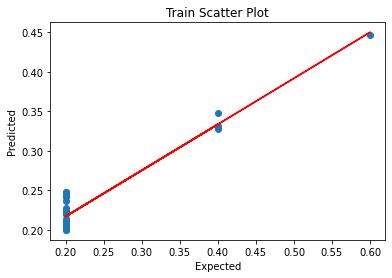

In [77]:
plt.ylabel("Predicted")
plt.xlabel("Expected")
plt.title("Train Scatter Plot")
plt.plot(y_trainr, model_reg.predict(X_trainr), 'o')
m, b = np.polyfit(y_trainr, model_reg.predict(X_trainr), 1)
plt.plot(y_trainr, m*y_trainr + b, 'r')
plt.show()

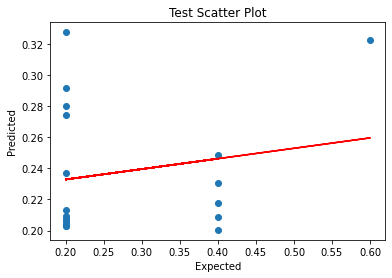

In [78]:
plt.ylabel("Predicted")
plt.xlabel("Expected")
plt.title("Test Scatter Plot")
plt.plot(y_testr, model_reg.predict(X_testr), 'o')
m, b = np.polyfit(y_testr, model_reg.predict(X_testr), 1)
plt.plot(y_testr, m*y_testr + b, 'r')
plt.show()